<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> <h1>Tarea Semanal 11: Sintesis de Funciones Disipativas</h1></center>
<h3> Teoría de circuitos 2 </h3>
<h3> 2do Cuatrimestre 2023 </h3>    
<h3> Facundo N. Iglesias </h3>    
</div>

<div class="alert alert-success text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>INDICE</h1></center>
    
</div>

0. [LIBRERIAS](#lib)

1. [PARTE 1](#parte1)

2. [PARTE 2](#parte2)
    
3. [ANEXO](#anexo)
    

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="lib">
        <h1> LIBRERIAS</h1>
    </a> 
</center>
</div>

In [180]:
#Numeric
import numpy as np
from numpy import sqrt
#Simbolic
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
from sympy.solvers import solve
#Visual & graphs
from IPython.display import IFrame, display, Math
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import IFrame, display, Math
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
#Simulation
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys,  tf2sos_analog
from pytc2.sistemas_lineales import plot_plantilla, group_delay
import scipy.io as sio
import warnings
warnings.filterwarnings('ignore')
#Sintesis
from pytc2.sintesis_dipolo import foster, cauer_LC
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion, dibujar_cauer_LC
from pytc2.general import print_latex
from pytc2.remociones import remover_valor, remover_polo_sigma
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_espacio_derivacion, Resistor,dibujar_tanque_RC_derivacion, dibujar_elemento_derivacion
from pytc2.dibujar import Capacitor, Inductor, dibujar_elemento_derivacion
from pytc2.remociones import remover_polo_infinito

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="parte1">
        <h1> PARTE 1</h1>
    </a> 
</center>
</div>


<img src="./rsc/consigna1.png" align="center" width="1196" height="599" /> 

<a name="1">
   <h2>1) Encontrar el valor de los componentes</h2>
</a>

A continuación se realizará la verificación paso por paso del método gráfico y el algebra realizada a mano (ver anexo al final del documento). Para ello se emplean funciones de la librería de la catedra "PyTc2" para calcular los residuos y las inmitancias obtenidas en cada remoción.

Antes de comenzar, vamos a caracterizar la función de excitación dada para realizar un análisis previo:

* Cantidad de ceros: 2
* Cantidad de polos: 2
* Total de singularidades: N=4
* Valor de Z en 0: 8/3
* Valor de Z en infinito: 1

Vemos que un circuito obtenido exclusivamente a partir de remociones totales tendría un total de 5 componentes (N+1) pero el circuito con el que debemos cumplir tiene 7, por lo tanto la sintesis no será canónica es decir no tendrá una cantidad mínima de componentes para cumplir con la función de excitación. Además se debe cumplir con las condiciones que imponen las constantes de tiempo lo que implica que se deban realizar remociones parciales en determinados polos. 

Una premisa más que se debe tener en cuenta es que el valor real en cero es mayor que el valor infinito, por lo tanto una remoción inicial de una constante debe ser menor o igual a este último valor, ya que remover un valor resistivo implica reducir el nivel de impedancia para toda la función de excitación.

### Resolución simbólica

En primer lugar definimos la función de excitación:

In [129]:
s = sp.symbols('s ', complex=True)
Z = (s**2+6*s+8)/(s**2+4*s+3)
Z

(s**2 + 6*s + 8)/(s**2 + 4*s + 3)

La primera remoción es un componente en serie por lo tanto se realiza sobre la propia impedanica, además es una remoción parcial ya que Z2 debe tener un cero en -6 para que R1 y C1 resuenen a 6 rad/s.

In [139]:
sigma1 = 6 
Z2, Z1 = remover_valor(Z, sigma_zero = sigma1)
print("Se removió un resistor de valor ")
display(Z1)
print("Obteniendo la siguiente Z2:")
display(Z2)

Se removió un resistor de valor 


8/15

Obteniendo la siguiente Z2:


(s + 6)*(7*s + 16)/(15*(s + 1)*(s + 3))

Ahora podemos remover totalmente el polo de admitancia en -6 obteniendo un tanque serie en derivación compuesto por R1 y C1:

In [143]:
Y4, Y3, R1, C1 = remover_polo_sigma(1/Z2, sigma1, isImpedance = False)
print("La admitancia removida es: ")
display(Y3)
print("Compuesta por un capacitor de: ")
display(C1)
print("Y un resistor de: ")
display(R1)
print("Y como resultado nos queda la admitancia Y4: ")
display(Y4)

La admitancia removida es: 


75*s/(52*(s + 6))

Compuesta por un capacitor de: 


25/104

Y un resistor de: 


52/75

Y como resultado nos queda la admitancia Y4: 


15*(17*s + 26)/(52*(7*s + 16))

Nuevamente debemos realizar una remoción parcial para cumplir ahora con la condición de resonancia impuesta por R2 y C2:

In [145]:
sigma2 = sp.Rational('7/2')
Z6, Rb = remover_valor(1/Y4, sigma_zero = sigma2)
print("Removemos entonces un resistor de valor: ")
display(Rb)
print("Y la Z6 queda igual a: ")
display(Z6)

Removemos entonces un resistor de valor: 


884/1005

Y la Z6 queda igual a: 


312*(2*s + 7)/(67*(17*s + 26))

Ahora podemos remover totalmente el polo de admitancia en -7/2 obteniendo un tanque serie en derivación compuesto por R2 y C2:

In [158]:
Y8, Y7, R2, C2 = remover_polo_sigma(1/Z6, sigma2, isImpedance = False)
print("La admitancia removida es: ")
display(Y7)
print("Compuesta por un capacitor de: ")
display(C2)
print("Y un resistor de: ")
display(R2)
print("Y como resultado nos queda la admitancia Y8: ")
display(Y8)
print("En este punto el valor real en infinito es igual al valor real en 0, lo que da como resultado un resistor de valor:")
Rc = 1/Y8
display(Rc)

La admitancia removida es: 


4489*s/(4368*(s + 7/2))

Compuesta por un capacitor de: 


4489/15288

Y un resistor de: 


4368/4489

Y como resultado nos queda la admitancia Y8: 


67/84

En este punto el valor real en infinito es igual al valor real en 0, lo que da como resultado un resistor de valor:


84/67

### Red resultante:
Dibujamos la red utilizando las funciones de la librería de la catedra:

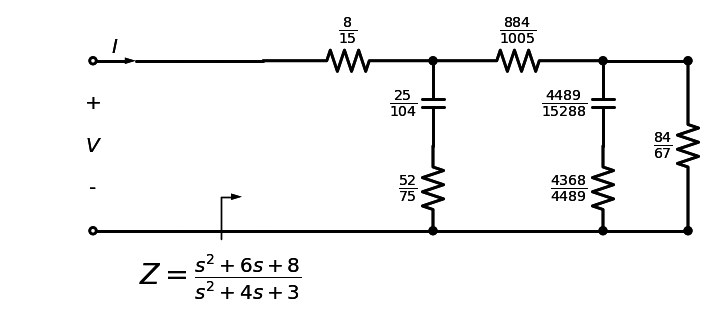

In [159]:
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')
d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          Z, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Resistor, Ra)

d = dibujar_tanque_RC_derivacion(d, R1, C1)
    
d = dibujar_elemento_serie(d, Resistor, Rb)

d = dibujar_tanque_RC_derivacion(d, R2, C2)
                        
d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, R8)

display(d)

Vemos que coincide con el circuito obtenido a mano (ver anexo).

-----

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="parte2">
        <h1> PARTE 2</h1>
    </a> 
</center>
</div>


<img src="./rsc/consigna2.png" align="center" width="1196" height="599" />   

Analizando el circuito y la función de excitación que debe cumplir la sintesis observamos que tiene:
* Ceros complejos conjugados: 2
* Polos complejos conjugados: 2
* Polos reales: 1
* Cantidad de singularidades: N= 5

Una sintesis canónica da como resultado un circuito de 6 componentes (N+1) como el indicado, por lo tanto, se puede resolver realizando solo remociones totales.

### Resolución simbólica

Definimos la función de excitación:

In [182]:
s = sp.symbols('s ', complex=True)
Z = (s**2+s+1)/(s**2+2*s+5)/(s+1)
Z

(s**2 + s + 1)/((s + 1)*(s**2 + 2*s + 5))

#### 1era remoción total 
Se remueve el polo en infinito de Y para obtener C1:

In [184]:
Y2, Yc1 = remover_polo_infinito(1/Z)
print("Extraemos la admitancia Y1 igual a :")
display(Yc1)
C1 = Yc1/s
print("Resultando en un capacitor en derivación de {} F\n".format(C1))
print("La admitancia Y2 queda:")
display(Y2)

Extraemos la admitancia Y1 igual a :


s

Resultando en un capacitor en derivación de 1 F

La admitancia Y2 queda:


(2*s**2 + 6*s + 5)/(s**2 + s + 1)

#### 2da remoción total 
Analizamos los valores en los extremos de Y2 para ver cual es el máximo valor que puedo remover: 

In [191]:
Ginf = sp.limit(Y2, s, sp.oo)
G0 = sp.limit(Y2, s, 0)
G0
print("Valor en cero: " + str(G0))
print("Valor en infinito: " + str(Ginf))
print("Por lo tanto el máximo valor que podemos remover para no afectar la función y que siga siendo FRP es 2.")

Valor en cero: 5
Valor en infinito: 2
Por lo tanto el máximo valor que podemos remover para no afectar la función y que siga siendo FRP es 2.


Entonces de Y2 removemos el resistor en derivación R1:

In [195]:
R1 = 1/np.min((Ginf, G0))
Y4 = sp.factor(sp.simplify(sp.expand(Y2 - 1/R1)))
print("El valor de R1 es " + str(R1))
print("\nY4 queda igual a: ")
display(Y4)

El valor de R1 es 1/2

Y4 queda igual a: 


(4*s + 3)/(s**2 + s + 1)

#### 3ra remoción total 
Removemos ahora un polo en infinito en Z4 para obtener el inductor en serie L1:

In [201]:
Z6, Zl1 = remover_polo_infinito(1/Y4)
L1 = Zl1/s
print("La impedancia removida es: ")
display(Zl1)
print("Correspondiente con un inductor de valor {} H".format(L1))
print("\nZ6 queda igual a:")
display(Z6)

La impedancia removida es: 


s/4

Correspondiente con un inductor de valor 1/4 H

Z6 queda igual a:


(s + 4)/(4*(4*s + 3))

#### 4ra remoción total 
Analizamos nuevamente los extremos:

In [205]:
Rinf = sp.limit(Z6, s, sp.oo)
R0 = sp.limit(Z6, s, 0)
R2 = np.min((Rinf, R0))
print('El valor real en infinito es: '+ str(Rinf))
print('El valor real en cero es: '+ str(R0))
print('Por lo tanto, el máximo valor que podemos remover es: '+ str(R2))

El valor real en infinito es: 1/16
El valor real en cero es: 1/3
Por lo tanto, el máximo valor que podemos remover es: 1/16


In [206]:
Z8 = sp.factor(sp.simplify(sp.expand(Z6 - R2)))
print("Luego de remover el resistor R2, Z8 queda igual a:")
display(Z8)

Luego de remover el resistor R2, Z8 queda igual a:


13/(16*(4*s + 3))

#### 5ta remoción total 
Finalmente queda un tanque RC:

In [209]:
C2 = sp.limit(1/s/Z8, s, sp.oo)
Y10, Yc2 = remover_polo_infinito(1/Z8)
C2 = Yc2/s
R3 = 1/Y10
print("El valor del resistor es: {} Ohm y el del capacitor {} F".format(R3,C2))

El valor del resistor es: 13/48 Ohm y el del capacitor 64/13 F


### Red resultante:

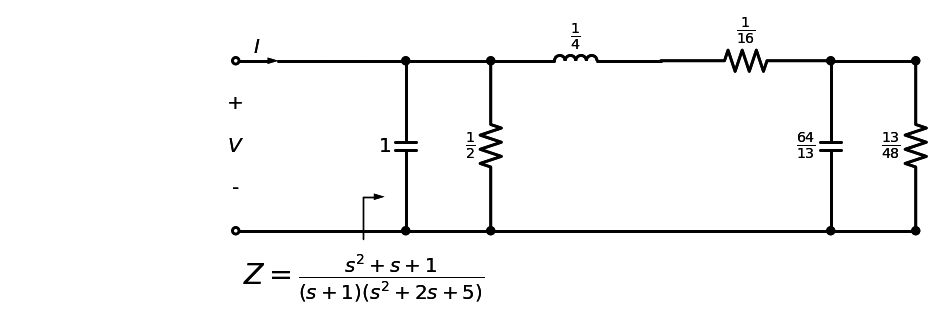

In [211]:
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          Z, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_derivacion(d, Capacitor, C1)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, R1)
    
d = dibujar_elemento_serie(d, Inductor, L1)

d = dibujar_elemento_serie(d, Resistor, R2)

d = dibujar_elemento_derivacion(d, Capacitor, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, R3)

display(d)

Vemos que verifica el circuito obtenido a mano en el anexo.

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="anexo">
        <h1> ANEXO </h1>
    </a> 
</center>
</div>


In [128]:
IFrame("./rsc/resolucion.pdf", width=1000, height=1000)

------------------------